# USA Rainfall Prediction

In [1]:
# Import modules

import pandas as pd
import numpy as np

In [2]:
# Read in the dataset

df = pd.read_csv("usa_rain_prediction_dataset_2024_2025.csv")

In [3]:
df.head()

,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,2024-01-01,New York,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0
1,2024-01-02,New York,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0
2,2024-01-03,New York,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1
3,2024-01-04,New York,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0
4,2024-01-05,New York,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0


## Data Cleaning

In [4]:
# Check for missing values

df.isnull().sum()

Date             0
Location         0
Temperature      0
Humidity         0
Wind Speed       0
Precipitation    0
Cloud Cover      0
Pressure         0
Rain Tomorrow    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           73100 non-null  object 
 1   Location       73100 non-null  object 
 2   Temperature    73100 non-null  float64
 3   Humidity       73100 non-null  float64
 4   Wind Speed     73100 non-null  float64
 5   Precipitation  73100 non-null  float64
 6   Cloud Cover    73100 non-null  float64
 7   Pressure       73100 non-null  float64
 8   Rain Tomorrow  73100 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 5.0+ MB


## Data Visualization

In [6]:
# Import visualization modules

import seaborn as sns
import matplotlib.pyplot as plt

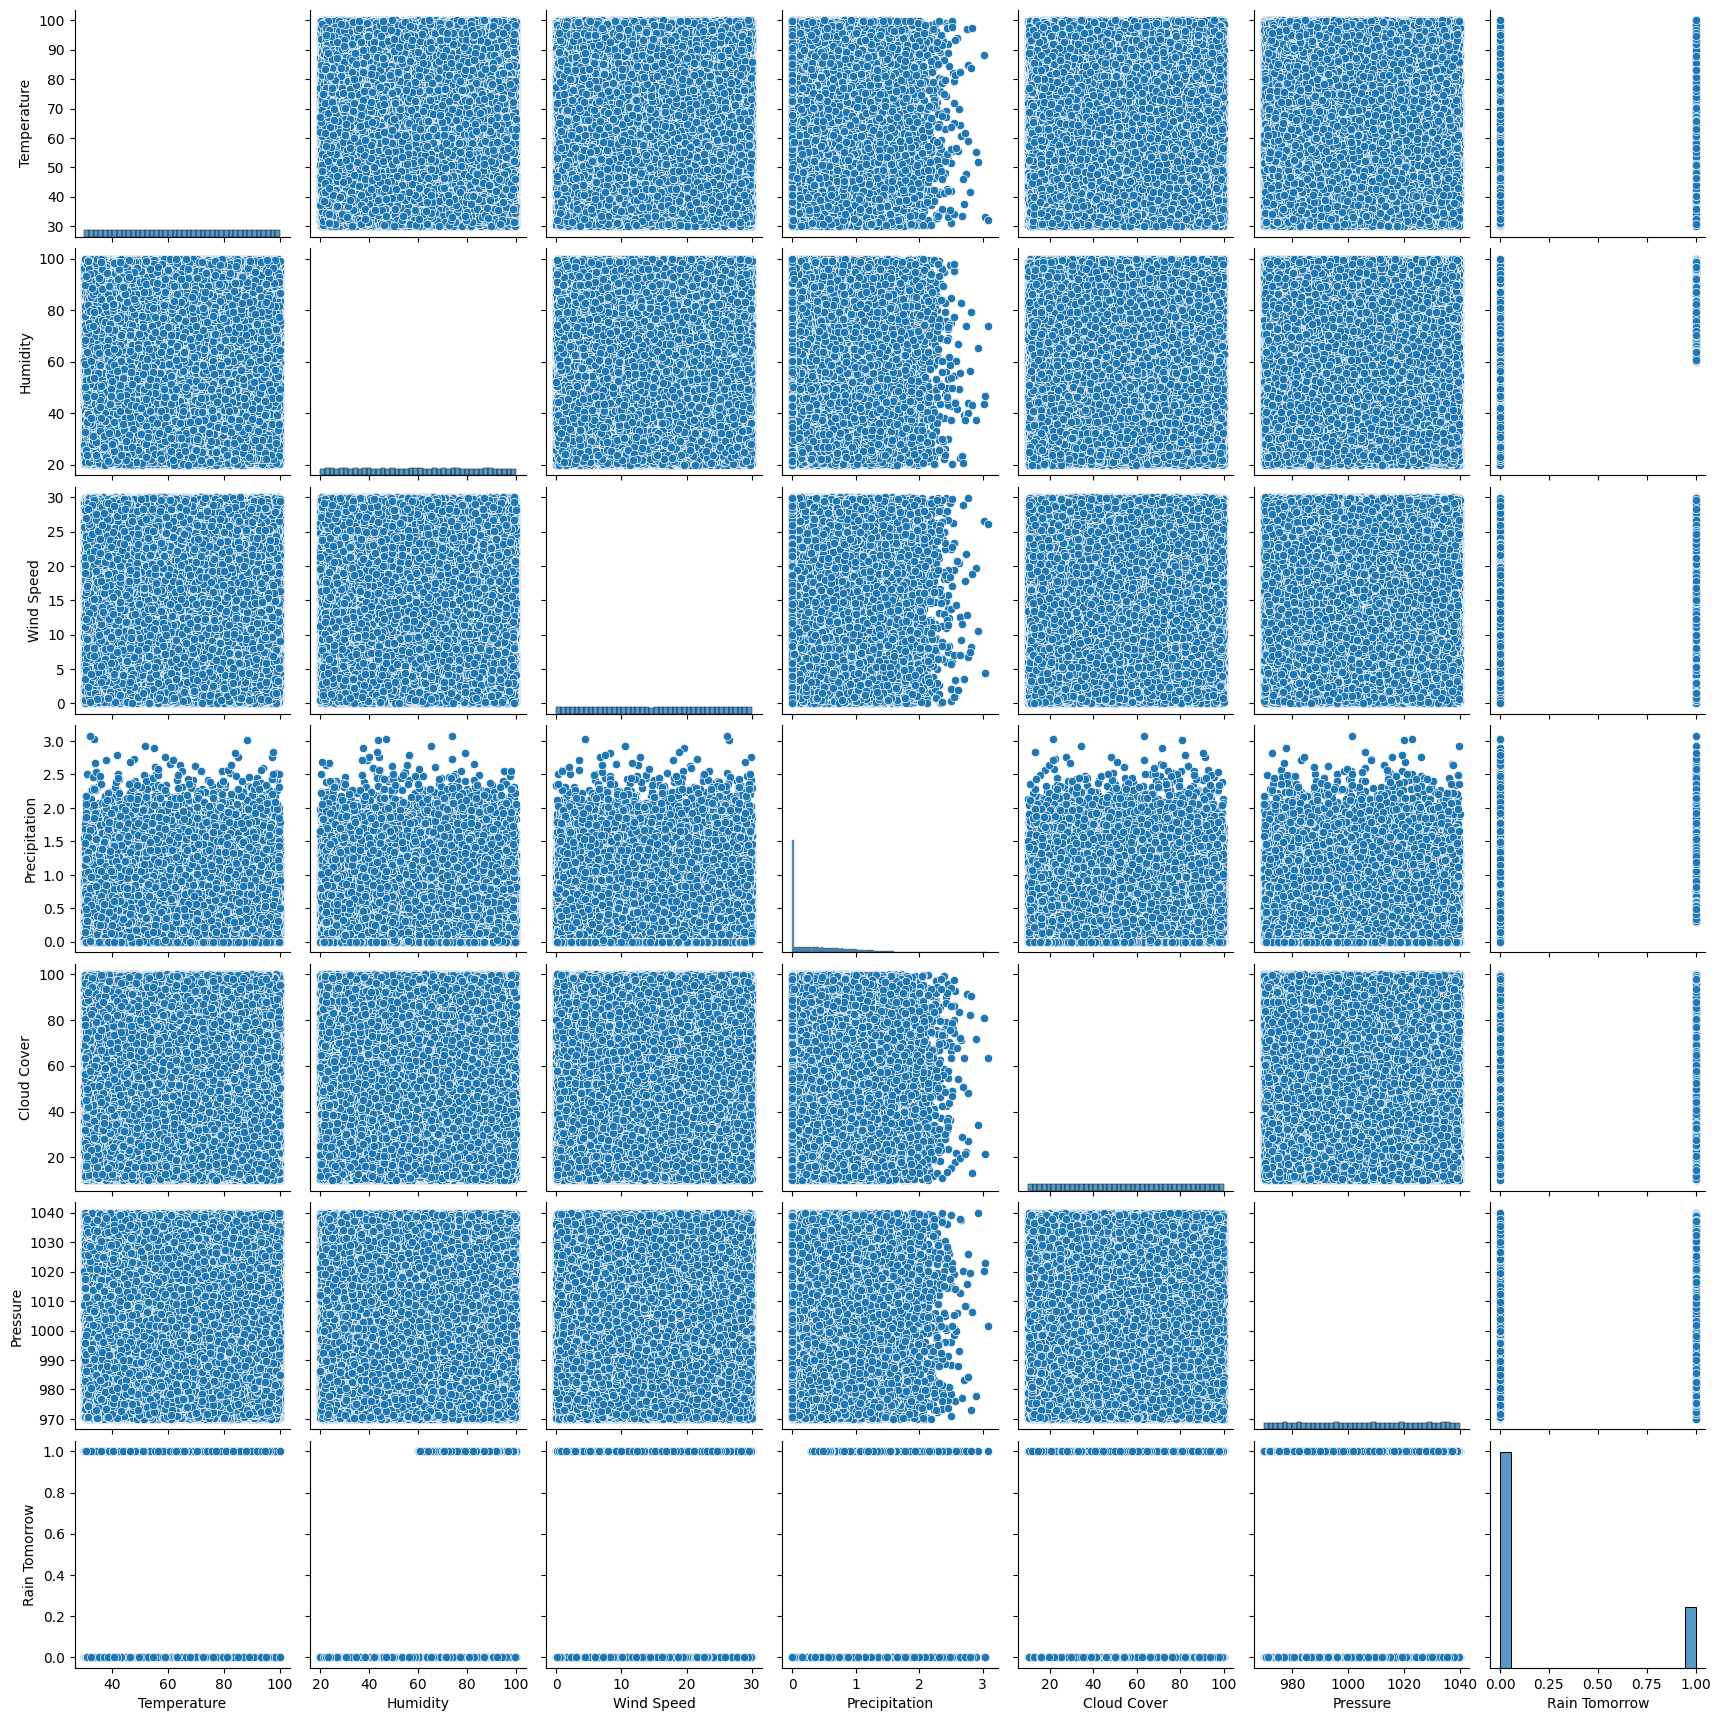

In [7]:
sns.pairplot(df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'New York'),
  Text(1, 0, 'Los Angeles'),
  Text(2, 0, 'Chicago'),
  Text(3, 0, 'Houston'),
  Text(4, 0, 'Phoenix'),
  Text(5, 0, 'Philadelphia'),
  Text(6, 0, 'San Antonio'),
  Text(7, 0, 'San Diego'),
  Text(8, 0, 'Dallas'),
  Text(9, 0, 'San Jose'),
  Text(10, 0, 'Austin'),
  Text(11, 0, 'Jacksonville'),
  Text(12, 0, 'Fort Worth'),
  Text(13, 0, 'Columbus'),
  Text(14, 0, 'Indianapolis'),
  Text(15, 0, 'Charlotte'),
  Text(16, 0, 'San Francisco'),
  Text(17, 0, 'Seattle'),
  Text(18, 0, 'Denver'),
  Text(19, 0, 'Washington D.C.')])

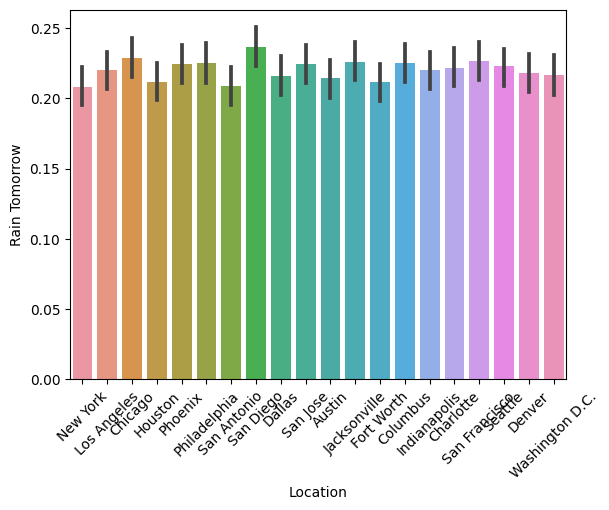

In [8]:
sns.barplot(x='Location', y='Rain Tomorrow', data=df)
plt.xticks(rotation=45)

## Feature Engineering

Feature Engineering typically involves:
1. Data Encoding
2. Data Scaling
3. Data Splitting

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
# Instantiate the object

enc = LabelEncoder()

In [11]:
df['Location'] = enc.fit_transform(df['Location'])

In [12]:
# Save encoder object

import pickle

pickle.dump(enc, open('location_encoder.pkl', 'wb'))

In [13]:
df.head()

,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,2024-01-01,11,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0
1,2024-01-02,11,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0
2,2024-01-03,11,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1
3,2024-01-04,11,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0
4,2024-01-05,11,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X=df.drop(['Date', 'Rain Tomorrow'], axis=1) # feature set
y=df['Rain Tomorrow'] # target set

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Model Training

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [18]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [19]:
pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.9029639762881897

In [20]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

1.0

In [21]:
model = SVC()
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.7777473780209758

In [22]:
import pickle

In [23]:
pickle.dump(model, open('model.pkl', 'wb'))

In [24]:
# Save best performing model to disk

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

pickle.dump(model, open('model.pkl', 'wb'))